In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
import os
import gzip
import shutil

%cd /content/drive/My Drive/Colab Notebooks/

coco_dir = "coco"
if not os.path.exists(coco_dir):
    os.makedirs(coco_dir)
%cd $coco_dir

tallyqa = "https://github.com/manoja328/tallyqa/blob/master/tallyqa.zip?raw=true"
tallyqa_dir = "tallyqa"
tallyqa_zip_dir = "tallyqa.zip?raw=true"

if not os.path.exists(tallyqa_dir):
    if not os.path.exists(tallyqa_zip_dir):
        !wget $tallyqa
    import zipfile
    with zipfile.ZipFile(tallyqa_zip_dir,"r") as zip_ref:
        zip_ref.extractall()
    os.remove(tallyqa_zip_dir)

train           = "http://images.cocodataset.org/zips/train2014.zip"
train_dir       = "train2014"
train_zip_dir   = "train2014.zip"

val             = "http://images.cocodataset.org/zips/val2014.zip"
val_dir         = "val2014"
val_zip_dir     = "val2014.zip"

test            = "http://images.cocodataset.org/zips/test2015.zip"
test_dir        = "test2015"
test_zip_dir    = "test2015.zip"

if not os.path.exists(train_dir):
    if not os.path.exists(train_zip_dir):
        !wget $train
    import zipfile
    with zipfile.ZipFile(train_zip_dir,"r") as zip_ref:
        zip_ref.extractall()
    os.remove(train_zip_dir)
"""
if not os.path.exists(val_dir):
    if not os.path.exists(val_zip_dir):
        !wget $val
    import zipfile
    with zipfile.ZipFile(val_zip_dir,"r") as zip_ref:
        zip_ref.extractall()
    os.remove(val_zip_dir)
if not os.path.exists(test_dir):
    if not os.path.exists(test_zip_dir):
        !wget $test
    import zipfile
    with zipfile.ZipFile(test_zip_dir,"r") as zip_ref:
        zip_ref.extractall()
    os.remove(test_zip_dir)
"""
%ls

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/coco
--2024-07-01 09:54:08--  https://github.com/manoja328/tallyqa/blob/master/tallyqa.zip?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/manoja328/TallyQA_dataset/blob/master/tallyqa.zip?raw=true [following]
--2024-07-01 09:54:08--  https://github.com/manoja328/TallyQA_dataset/blob/master/tallyqa.zip?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/manoja328/TallyQA_dataset/raw/master/tallyqa.zip [following]
--2024-07-01 09:54:08--  https://github.com/manoja328/TallyQA_dataset/raw/master/tallyqa.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/manoja328/Tall

In [4]:
import json
import numpy as np
import pandas as pd

with open('train.json', 'r') as file:
    train_data = json.load(file)
train_df = pd.DataFrame(train_data)
train_df

,image,answer,data_source,question,image_id,question_id
0,VG_100K/4.jpg,2,imported_genome,How many chairs are pictured?,90000004,30092475
1,VG_100K/4.jpg,2,imported_genome,How many chairs are at the table?,90000004,30092476
2,VG_100K/4.jpg,1,imported_genome,How many things are purple?,90000004,30092477
3,VG_100K/4.jpg,2,imported_genome,How many curtains are there?,90000004,30092478
4,VG_100K/4.jpg,2,imported_genome,How many chairs?,90000004,30092479
...,...,...,...,...,...,...
249313,train2014/COCO_train2014_000000381301.jpg,0,generate,How many giraffe heads can you see?,381301,91242741
249314,train2014/COCO_train2014_000000372976.jpg,0,generate,How many bikes are shown?,372976,90046731
249315,train2014/COCO_train2014_000000539475.jpg,0,generate,How many giraffes have dark spots?,539475,91002344
249316,train2014/COCO_train2014_000000076901.jpg,0,generate,How many red bird in this image?,76901,91262910


In [5]:
train_df['image_source'] = train_df['image'].apply(lambda x: x.split('/')[0])
train_df['is_VG']        = train_df['image'].apply(lambda x: 'VG' in x)
train_df

,image,answer,data_source,question,image_id,question_id,image_source,is_VG
0,VG_100K/4.jpg,2,imported_genome,How many chairs are pictured?,90000004,30092475,VG_100K,True
1,VG_100K/4.jpg,2,imported_genome,How many chairs are at the table?,90000004,30092476,VG_100K,True
2,VG_100K/4.jpg,1,imported_genome,How many things are purple?,90000004,30092477,VG_100K,True
3,VG_100K/4.jpg,2,imported_genome,How many curtains are there?,90000004,30092478,VG_100K,True
4,VG_100K/4.jpg,2,imported_genome,How many chairs?,90000004,30092479,VG_100K,True
...,...,...,...,...,...,...,...,...
249313,train2014/COCO_train2014_000000381301.jpg,0,generate,How many giraffe heads can you see?,381301,91242741,train2014,False
249314,train2014/COCO_train2014_000000372976.jpg,0,generate,How many bikes are shown?,372976,90046731,train2014,False
249315,train2014/COCO_train2014_000000539475.jpg,0,generate,How many giraffes have dark spots?,539475,91002344,train2014,False
249316,train2014/COCO_train2014_000000076901.jpg,0,generate,How many red bird in this image?,76901,91262910,train2014,False


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
def display_five(df):
    sample_data = df.sample(n=5)
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    for ax, (index, row) in zip(axes, sample_data.iterrows()):
        img = mpimg.imread(row['image'])
        ax.imshow(img)
        ax.set_title(f"Q: {row['question']}\nA: {row['answer']}")
        ax.axis('off')
    plt.show()

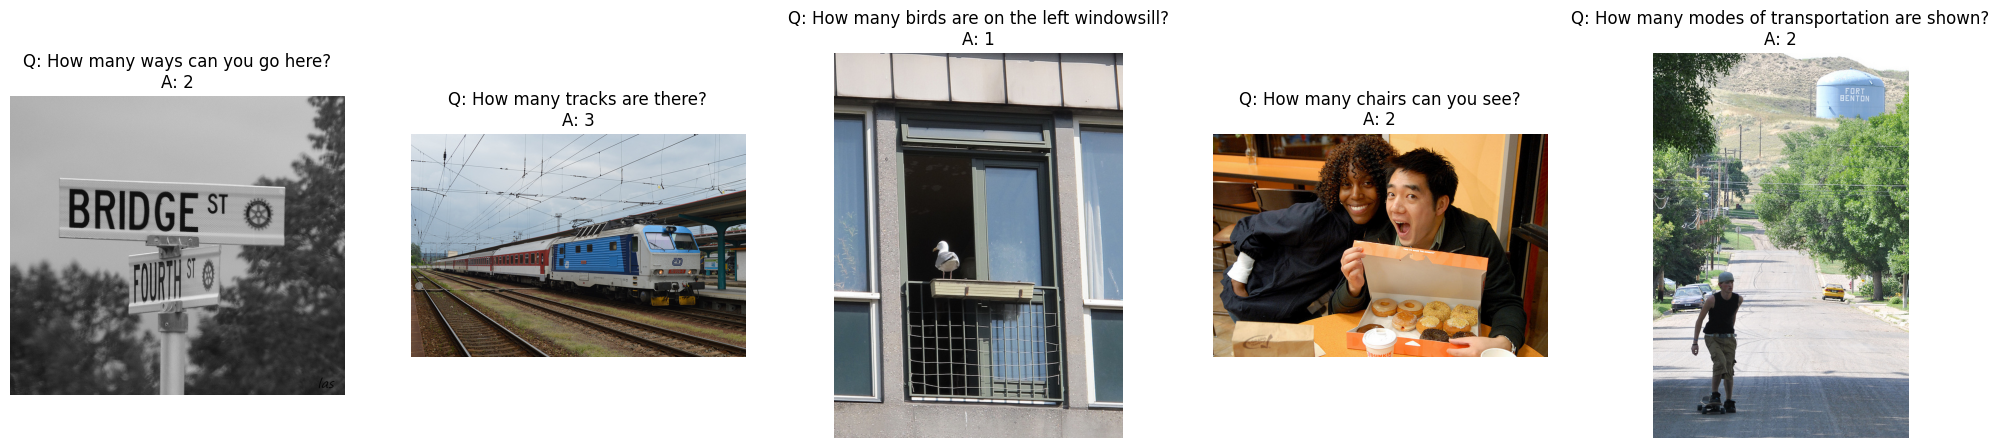

In [8]:
train_df_coco = train_df[(train_df['is_VG'] == False) & (train_df['image_source'] == "train2014")]
display_five(train_df_coco)

Label counts:
 answer
0     37881
1     21892
2     38202
3     15494
4      8686
5      4463
6      2929
7      1764
8      1409
9       843
10      682
11      469
12      409
13      216
14      172
15       46
Name: count, dtype: int64


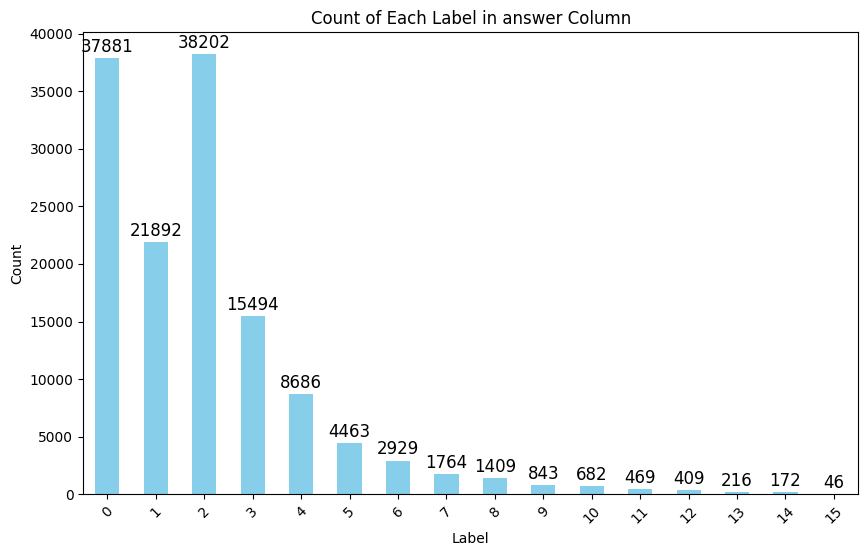

In [9]:
label_counts = train_df_coco['answer'].value_counts().sort_index()
print("Label counts:\n", label_counts)
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Label in answer Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha = 'center', va = 'center',
                  size = 12, xytext = (0, 8),
                  textcoords = 'offset points')

plt.show()

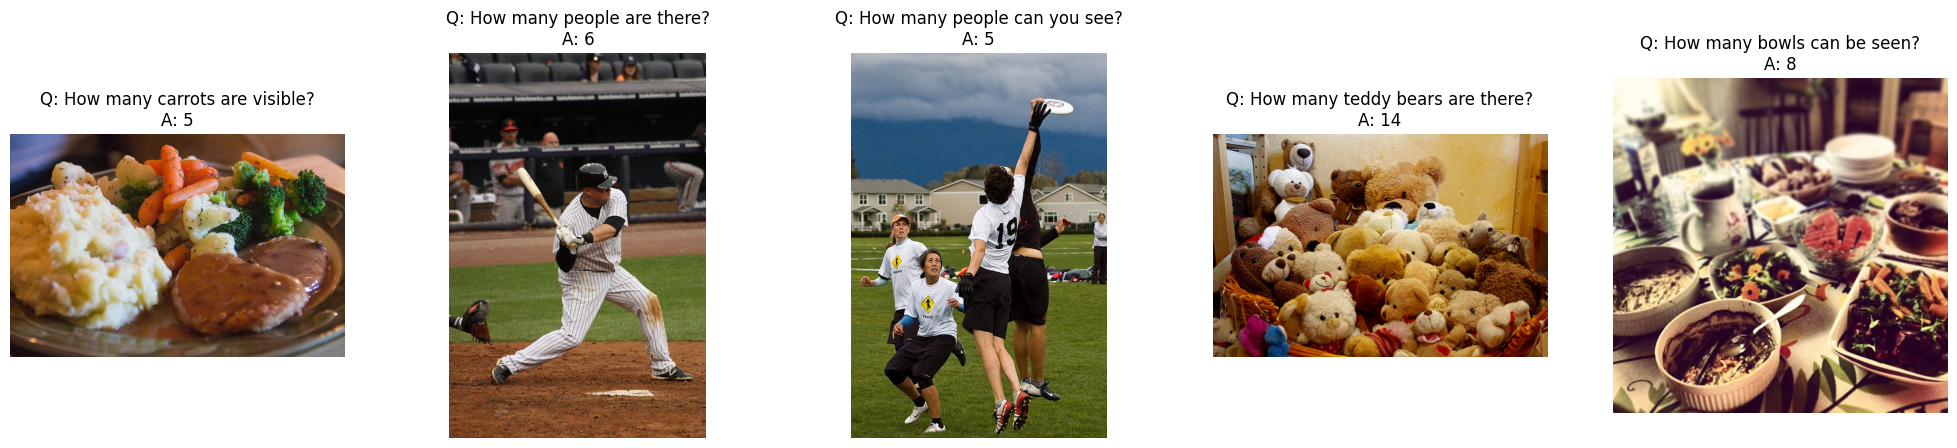

In [10]:
train_df_coco_heavy = train_df_coco[train_df_coco['answer'] >= 5].copy()
display_five(train_df_coco_heavy)

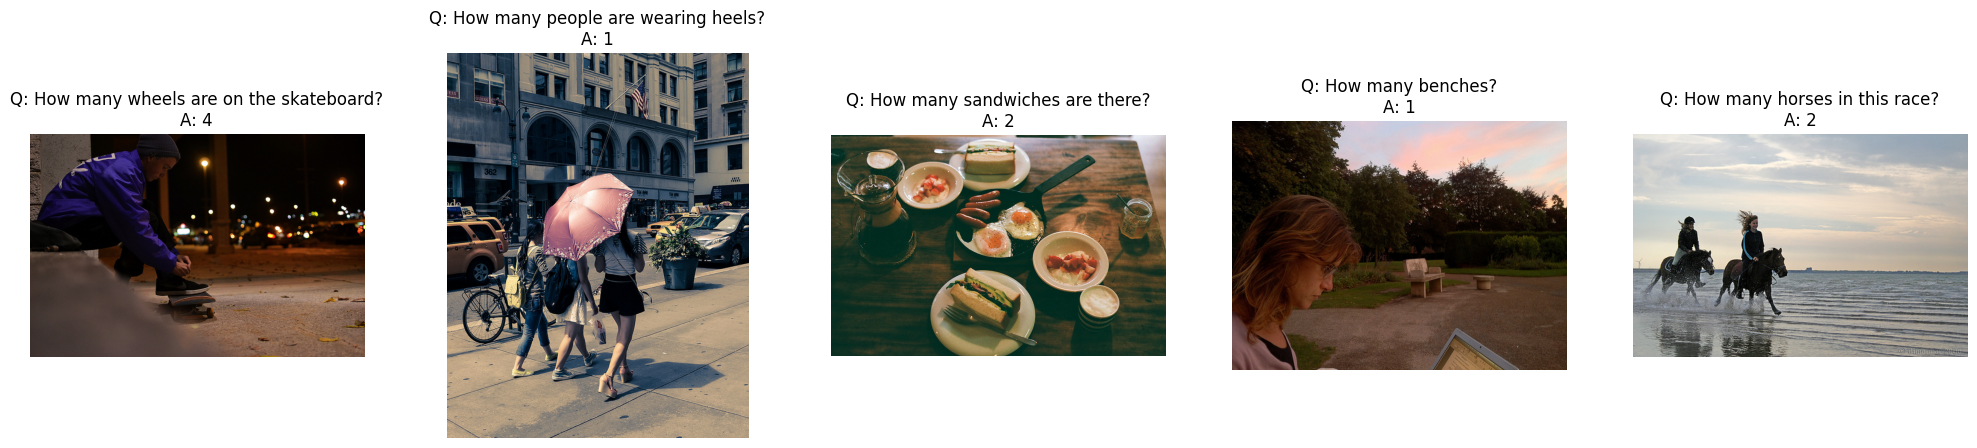

In [11]:
train_df_coco_light = train_df_coco[(train_df_coco['answer'] <= 4) & (train_df_coco['answer'] >= 1)].copy()
display_five(train_df_coco_light)

In [12]:
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

In [13]:
processor = BlipProcessor.from_pretrained("ybelkada/blip-vqa-capfilt-large")
VQAmodel = BlipForQuestionAnswering.from_pretrained("ybelkada/blip-vqa-capfilt-large", torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [14]:
def vqa_inference(image_path, question):
    raw_image = Image.open(image_path).convert('RGB')
    inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)
    out = VQAmodel.generate(**inputs)
    answer = processor.decode(out[0], skip_special_tokens=True)
    return answer

def calculate_metrics(df, n=0, random = True):
    if n != 0:
        if random:
            df = df.sample(n=n)
        else:
            df = df.head(n)
    correct_count = 0
    total_count = len(df)
    y_true = []
    y_pred = []
    for index, row in df.iterrows():
        predicted_answer = vqa_inference(row['image'], row['question'])
        actual_answer = str(row['answer'])
        #print(predicted_answer, actual_answer)
        y_true.append(actual_answer)
        y_pred.append(predicted_answer)
        if predicted_answer == actual_answer:
            correct_count += 1
    accuracy = correct_count / total_count if total_count > 0 else 0
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    try:
        y_true_numeric = list(map(float, y_true))
        y_pred_numeric = list(map(float, y_pred))
        rmse = np.sqrt(mean_squared_error(y_true_numeric, y_pred_numeric))
    except ValueError:
        rmse = None
    return {"total_count": total_count, "correct_count": correct_count,
            "accuracy": accuracy, "precision": precision, "recall": recall,
            "f1_score": f1, "rmse": rmse}

In [15]:
result = calculate_metrics(train_df_coco_heavy, n=100)
print(result)
result = calculate_metrics(train_df_coco_light, n=100)
print(result)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'total_count': 100, 'correct_count': 17, 'accuracy': 0.17, 'precision': 0.3369047619047619, 'recall': 0.17, 'f1_score': 0.2135032661285858, 'rmse': None}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'total_count': 100, 'correct_count': 52, 'accuracy': 0.52, 'precision': 0.6703027702520603, 'recall': 0.52, 'f1_score': 0.5804751235415747, 'rmse': None}


In [21]:
def get_min_samples_per_label(df):
    label_counts = df['answer'].value_counts()
    min_samples = label_counts.min()
    return min_samples

def plot_accuracy_per_label(df, only_min = True):
    label_counts = df['answer'].value_counts()
    min_samples = get_min_samples_per_label(df)
    accuracies = []

    for label in label_counts.index:
        label_df = df[df['answer'] == label]
        if only_min:
            label_df = label_df.sample(n=min_samples)
        metrics = calculate_metrics(label_df)
        accuracies.append(metrics['accuracy'])

    plt.figure(figsize=(12, 8))
    plt.bar(label_counts.index, accuracies, color='blue')
    plt.xlabel('Labels')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for each label with minimum number of samples')
    plt.xticks(rotation=90)
    plt.show()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control

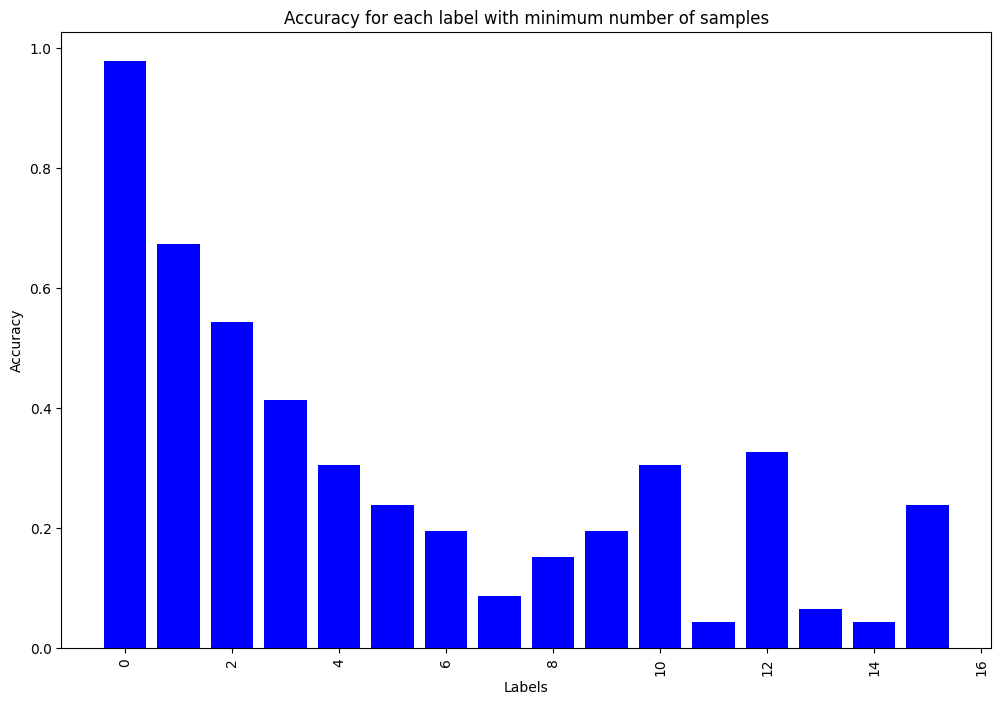

In [22]:
plot_accuracy_per_label(train_df_coco)